# Time Series Exercise - 

### Follow along with the instructions in bold. Watch the solutions video if you get stuck!

## The Data

** Source: https://datamarket.com/data/set/22ox/monthly-milk-production-pounds-per-cow-jan-62-dec-75#!ds=22ox&display=line **

**Monthly milk production: pounds per cow. Jan 62 - Dec 75**

** Import numpy pandas and matplotlib **

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

from keras import backend as K

#Clear TF memory
cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=cfg))

C:\Users\StrikeWade\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
C:\Users\StrikeWade\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


** Use pandas to read the csv of the monthly-milk-production.csv file and set index_col='Month' **

In [2]:
df = pd.read_csv('monthly-milk-production.csv', index_col='Month')

** Check out the head of the dataframe**

In [3]:
df.head()

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0


** Make the index a time series by using: **

    milk.index = pd.to_datetime(milk.index)

In [4]:
#Make the index columns as datetime
df.index = pd.to_datetime(df.index)

In [5]:
df

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0
1962-06-01 01:00:00,697.0
1962-07-01 01:00:00,640.0
1962-08-01 01:00:00,599.0
1962-09-01 01:00:00,568.0


** Plot out the time series data. **

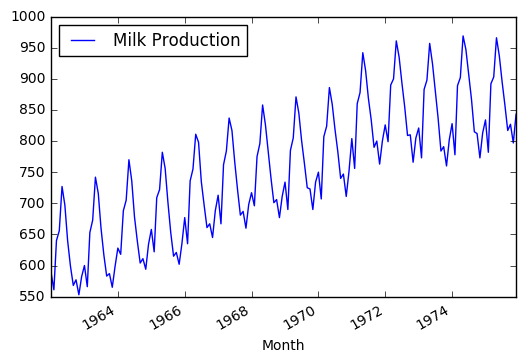

In [6]:
df.plot()

___

### Train Test Split

** Let's attempt to predict a year's worth of data. (12 months or 12 steps into the future) **

** Create a test train split using indexing (hint: use .head() or tail() or .iloc[]). We don't want a random train test split, we want to specify that the test set is the last 12 months of data is the test set, with everything before it is the training. **

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 01:00:00 to 1975-12-01 01:00:00
Data columns (total 1 columns):
Milk Production    168 non-null float64
dtypes: float64(1)
memory usage: 2.6 KB


In [8]:
train_set = df.head(156)
test_set = df.tail(12)

In [9]:
train_set.head()

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0


In [10]:
test_set.head()

,Milk Production
Month,
1975-01-01 01:00:00,834.0
1975-02-01 01:00:00,782.0
1975-03-01 01:00:00,892.0
1975-04-01 01:00:00,903.0
1975-05-01 01:00:00,966.0


### Scale the Data

** Use sklearn.preprocessing to scale the data using the MinMaxScaler. Remember to only fit_transform on the training data, then transform the test data. You shouldn't fit on the test data as well, otherwise you are assuming you would know about future behavior!**

In [11]:
scaler = MinMaxScaler()

In [12]:
train_data = scaler.fit_transform(train_set)
test_data = scaler.transform(test_set)

In [13]:
train_data.shape

(156, 1)

In [14]:
test_data.shape

(12, 1)

## Batch Function

** We'll need a function that can feed batches of the training data. We'll need to do several things that are listed out as steps in the comments of the function. Remember to reference the previous batch method from the lecture for hints. Try to fill out the function template below, this is a pretty hard step, so feel free to reference the solutions! **

In [15]:
def next_batch(training_data,batch_size,steps):
    """
    INPUT: Data, Batch Size, Time Steps per batch
    OUTPUT: A tuple of y time series results. y[:,:-1] and y[:,1:]
    """
    
    # STEP 1: Use np.random.randint to set a random starting point index for the batch.
    # Remember that each batch needs have the same number of steps in it.
    # This means you should limit the starting point to len(data)-steps
    
    random_start = np.random.randint(0, len(train_data)-steps)
    
    # STEP 2: Now that you have a starting index you'll need to index the data from
    # the random start to random start + steps + 1. Then reshape this data to be (1,steps+1)
    
    y_batch = np.array(train_data[random_start:random_start+steps+1]).reshape(1, steps+1)
    
    # STEP 3: Return the batches. You'll have two batches to return y[:,:-1] and y[:,1:]
    # You'll need to reshape these into tensors for the RNN to .reshape(-1,steps,1)
    
    return  y_batch[:,:-1].reshape(-1,steps,1), y_batch[:,1:].reshape(-1,steps,1), y_batch

In [16]:
a = next_batch(train_data, 20, 20)
print(a[0].shape, a[1].shape, a[2].shape)

(1, 20, 1) (1, 20, 1) (1, 21)


In [17]:
a[2]

array([[0.34615385, 0.20913462, 0.11057692, 0.03605769, 0.05769231,
        0.        , 0.06971154, 0.11298077, 0.03125   , 0.24038462,
        0.28846154, 0.45432692, 0.39182692, 0.25721154, 0.15384615,
        0.07211538, 0.08173077, 0.02884615, 0.10817308, 0.18028846,
        0.15625   ]])

In [18]:
a[0]

array([[[0.34615385],
        [0.20913462],
        [0.11057692],
        [0.03605769],
        [0.05769231],
        [0.        ],
        [0.06971154],
        [0.11298077],
        [0.03125   ],
        [0.24038462],
        [0.28846154],
        [0.45432692],
        [0.39182692],
        [0.25721154],
        [0.15384615],
        [0.07211538],
        [0.08173077],
        [0.02884615],
        [0.10817308],
        [0.18028846]]])

In [19]:
a[1]

array([[[0.20913462],
        [0.11057692],
        [0.03605769],
        [0.05769231],
        [0.        ],
        [0.06971154],
        [0.11298077],
        [0.03125   ],
        [0.24038462],
        [0.28846154],
        [0.45432692],
        [0.39182692],
        [0.25721154],
        [0.15384615],
        [0.07211538],
        [0.08173077],
        [0.02884615],
        [0.10817308],
        [0.18028846],
        [0.15625   ]]])

## Setting Up The RNN Model

** Import TensorFlow **

### The Constants

** Define the constants in a single cell. You'll need the following (in parenthesis are the values I used in my solution, but you can play with some of these): **
* Number of Inputs (1)
* Number of Time Steps (12)
* Number of Neurons per Layer (100)
* Number of Outputs (1)
* Learning Rate (0.03)
* Number of Iterations for Training (4000)
* Batch Size (1)

In [20]:
tf.reset_default_graph()

In [21]:
#Params
num_inputs = 1
num_neurons = 100
num_outputs = 1
num_timesteps = 12

#Network Params
learning_rate = 0.001
epochs = 6000
batch_size = 1

** Create Placeholders for X and y. (You can change the variable names if you want). The shape for these placeholders should be [None,num_time_steps-1,num_inputs] and [None, num_time_steps-1, num_outputs] The reason we use num_time_steps-1 is because each of these will be one step shorter than the original time steps size, because we are training the RNN network to predict one point into the future based on the input sequence.**  

In [22]:
x = tf.placeholder(dtype=tf.float32, shape=[None, num_timesteps, num_inputs])
y = tf.placeholder(dtype=tf.float32, shape=[None, num_timesteps, num_outputs])

** Now create the RNN Layer, you have complete freedom over this, use tf.contrib.rnn and choose anything you want, OutputProjectionWrappers, BasicRNNCells, BasicLSTMCells, MultiRNNCell, GRUCell etc... Keep in mind not every combination will work well! (If in doubt, the solutions used an Outputprojection Wrapper around a basic LSTM cell with relu activation.**

In [23]:
cell = tf.contrib.rnn.OutputProjectionWrapper(cell=tf.contrib.rnn.GRUCell(num_units=num_neurons, activation=tf.nn.relu), 
                                              output_size=num_outputs)

** Now pass in the cells variable into tf.nn.dynamic_rnn, along with your first placeholder (X)**

In [24]:
outputs, states = tf.nn.dynamic_rnn(cell=cell, inputs=x, dtype=tf.float32)

### Loss Function and Optimizer

** Create a Mean Squared Error Loss Function and use it to minimize an AdamOptimizer, remember to pass in your learning rate. **

In [25]:
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

** Initialize the global variables **

In [26]:
init = tf.global_variables_initializer()

** Create an instance of tf.train.Saver() **

In [27]:
saver = tf.train.Saver()

### Session

** Run a tf.Session that trains on the batches created by your next_batch function. Also add an a loss evaluation for every 100 training iterations. Remember to save your model after you are done training. **

In [28]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.85)

In [29]:
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    
    sess.run(init)
    
    for epoch in range(epochs):
        
        batch_x, batch_y, _ = next_batch(train_data, batch_size=batch_size, steps=num_timesteps)
        
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        
        if epoch % 100 == 0:
            mse = loss.eval(feed_dict={x: batch_x, y: batch_y})
            print(epoch, '\tMSE', mse)
    
    # Save Model for Later
    saver.save(sess, "time_series_model_ex/")

0 	MSE 0.115727626
100 	MSE 0.03152318
200 	MSE 0.021972418
300 	MSE 0.012306322
400 	MSE 0.015182228
500 	MSE 0.022390401
600 	MSE 0.0062720254
700 	MSE 0.008219319
800 	MSE 0.009454817
900 	MSE 0.009000898
1000 	MSE 0.009691676
1100 	MSE 0.008365204
1200 	MSE 0.0072209644
1300 	MSE 0.0082471585
1400 	MSE 0.00764448
1500 	MSE 0.0067708455
1600 	MSE 0.0064928704
1700 	MSE 0.0072853337
1800 	MSE 0.005064381
1900 	MSE 0.0053639035
2000 	MSE 0.0054919147
2100 	MSE 0.0074376087
2200 	MSE 0.006946835
2300 	MSE 0.0066447384
2400 	MSE 0.004842932
2500 	MSE 0.0076353787
2600 	MSE 0.005981384
2700 	MSE 0.0051383725
2800 	MSE 0.008016185
2900 	MSE 0.005002028
3000 	MSE 0.0041830447
3100 	MSE 0.0049366746
3200 	MSE 0.0050605233
3300 	MSE 0.0056384616
3400 	MSE 0.0060923942
3500 	MSE 0.0070528057
3600 	MSE 0.0053998604
3700 	MSE 0.0035736803
3800 	MSE 0.003964491
3900 	MSE 0.0054904683
4000 	MSE 0.004828311
4100 	MSE 0.0072369073
4200 	MSE 0.0058372025
4300 	MSE 0.0028129194
4400 	MSE 0.001984764


______

## Predicting Future (Test Data)

** Show the test_set (the last 12 months of your original complete data set) **

In [30]:
test_set

,Milk Production
Month,
1975-01-01 01:00:00,834.0
1975-02-01 01:00:00,782.0
1975-03-01 01:00:00,892.0
1975-04-01 01:00:00,903.0
1975-05-01 01:00:00,966.0
1975-06-01 01:00:00,937.0
1975-07-01 01:00:00,896.0
1975-08-01 01:00:00,858.0
1975-09-01 01:00:00,817.0


** Now we want to attempt to predict these 12 months of data, using only the training data we had. To do this we will feed in a seed training_instance of the last 12 months of the training_set of data to predict 12 months into the future. Then we will be able to compare our generated 12 months to our actual true historical values from the test set! **

# Generative Session
### NOTE: Recall that our model is really only trained to predict 1 time step ahead, asking it to generate 12 steps is a big ask, and technically not what it was trained to do! Think of this more as generating new values based off some previous pattern, rather than trying to directly predict the future. You would need to go back to the original model and train the model to predict 12 time steps ahead to really get a higher accuracy on the test data. (Which has its limits due to the smaller size of our data set)
** Fill out the session code below to generate 12 months of data based off the last 12 months of data from the training set. The hardest part about this is adjusting the arrays with their shapes and sizes. Reference the lecture for hints.**

In [31]:
train_data

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231],
       [0.        ],
       [0.06971154],
       [0.11298077],
       [0.03125   ],
       [0.24038462],
       [0.28846154],
       [0.45432692],
       [0.39182692],
       [0.25721154],
       [0.15384615],
       [0.07211538],
       [0.08173077],
       [0.02884615],
       [0.10817308],
       [0.18028846],
       [0.15625   ],
       [0.32451923],
       [0.36538462],
       [0.52163462],
       [0.43990385],
       [0.30048077],
       [0.20673077],
       [0.12259615],
       [0.13942308],
       [0.09855769],
       [0.19471154],
       [0.25240385],
       [0.16586538],
       [0.375     ],
       [0.40625   ],
       [0.55048077],
       [0.48798077],
       [0.35817308],
       [0.24038462],
       [0.14903846],
       [0.16346154],
       [0.11778846],
       [0.197

In [32]:
train_instance = list(train_data[-12:])

In [33]:
train_instance

[array([0.66105769]),
 array([0.54086538]),
 array([0.80769231]),
 array([0.83894231]),
 array([1.]),
 array([0.94711538]),
 array([0.85336538]),
 array([0.75480769]),
 array([0.62980769]),
 array([0.62259615]),
 array([0.52884615]),
 array([0.625])]

In [34]:
batch_x = np.array(train_instance[-num_timesteps:]).reshape(1, num_timesteps, 1)
print(batch_x)
print(batch_x.shape)

[[[0.66105769]
  [0.54086538]
  [0.80769231]
  [0.83894231]
  [1.        ]
  [0.94711538]
  [0.85336538]
  [0.75480769]
  [0.62980769]
  [0.62259615]
  [0.52884615]
  [0.625     ]]]
(1, 12, 1)


In [35]:
with tf.Session() as sess:
    
    # Use your Saver instance to restore your saved rnn time series model
    saver.restore(sess, "time_series_model_ex/")
    
    train_instance = list(train_data[-12:])
    
    for i in range(12):
        batch_x = np.array(train_instance[-num_timesteps:]).reshape(1, num_timesteps, 1)
        
        y_pred = sess.run(outputs, feed_dict={x: batch_x})
        
        train_instance.append(y_pred[0,-1,0])

    # CODE HERE!

INFO:tensorflow:Restoring parameters from time_series_model_ex/


** Show the result of the predictions. **

In [36]:
train_instance

[array([0.66105769]),
 array([0.54086538]),
 array([0.80769231]),
 array([0.83894231]),
 array([1.]),
 array([0.94711538]),
 array([0.85336538]),
 array([0.75480769]),
 array([0.62980769]),
 array([0.62259615]),
 array([0.52884615]),
 array([0.625]),
 0.6856432,
 0.562763,
 0.8410984,
 0.85060364,
 1.0075856,
 0.93554157,
 0.82042974,
 0.7075796,
 0.58279765,
 0.58863556,
 0.4921772,
 0.6195028]

** Grab the portion of the results that are the generated values and apply inverse_transform on them to turn them back into milk production value units (lbs per cow). Also reshape the results to be (12,1) so we can easily add them to the test_set dataframe.**

In [37]:
results = scaler.inverse_transform(np.array(train_instance[12:]).reshape(12,1))

In [38]:
results

array([[838.22754],
       [787.1094 ],
       [902.897  ],
       [906.8511 ],
       [972.15564],
       [942.1853 ],
       [894.29877],
       [847.3531 ],
       [795.4438 ],
       [797.8724 ],
       [757.7457 ],
       [810.71313]], dtype=float32)

** Create a new column on the test_set called "Generated" and set it equal to the generated results. You may get a warning about this, feel free to ignore it.**

In [39]:
test_set['Generated'] = results

C:\Users\StrikeWade\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


** View the test_set dataframe. **

In [40]:
test_set

,Milk Production,Generated
Month,,
1975-01-01 01:00:00,834.0,838.227539
1975-02-01 01:00:00,782.0,787.109375
1975-03-01 01:00:00,892.0,902.896973
1975-04-01 01:00:00,903.0,906.851074
1975-05-01 01:00:00,966.0,972.155640
1975-06-01 01:00:00,937.0,942.185303
1975-07-01 01:00:00,896.0,894.298767
1975-08-01 01:00:00,858.0,847.353088
1975-09-01 01:00:00,817.0,795.443787


** Plot out the two columns for comparison. **

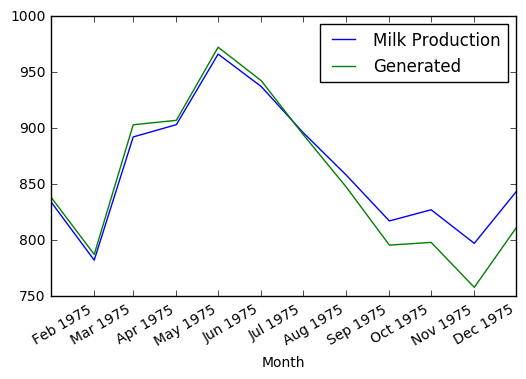

In [41]:
test_set.plot()

# Great Job!

Play around with the parameters and RNN layers, does a faster learning rate with more steps improve the model? What about GRU or BasicRNN units? What if you train the original model to not just predict one timestep ahead into the future, but 3 instead? Lots of stuff to add on here!